In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
from sklearn.model_selection import train_test_split
%matplotlib inline
import seaborn as sns

In [64]:
df=pd.read_excel("C:\\Users\91945\Downloads\Flight_Ticket_Participant_Datasets-20190305T100527Z-001\Flight_Ticket_Participant_Datasets\Data_Train.xlsx")
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [3]:
df.info()#checking datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


All features are object and having two null values in Route and Total_stops.

In [4]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [65]:
#let's drop null and keep our dataset genuine.
df.dropna(inplace=True)

In [66]:
#dropping Duplicates
df.drop_duplicates(inplace=True)

In [7]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

### checking relation between airline and price
#### all feature are categorical .

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

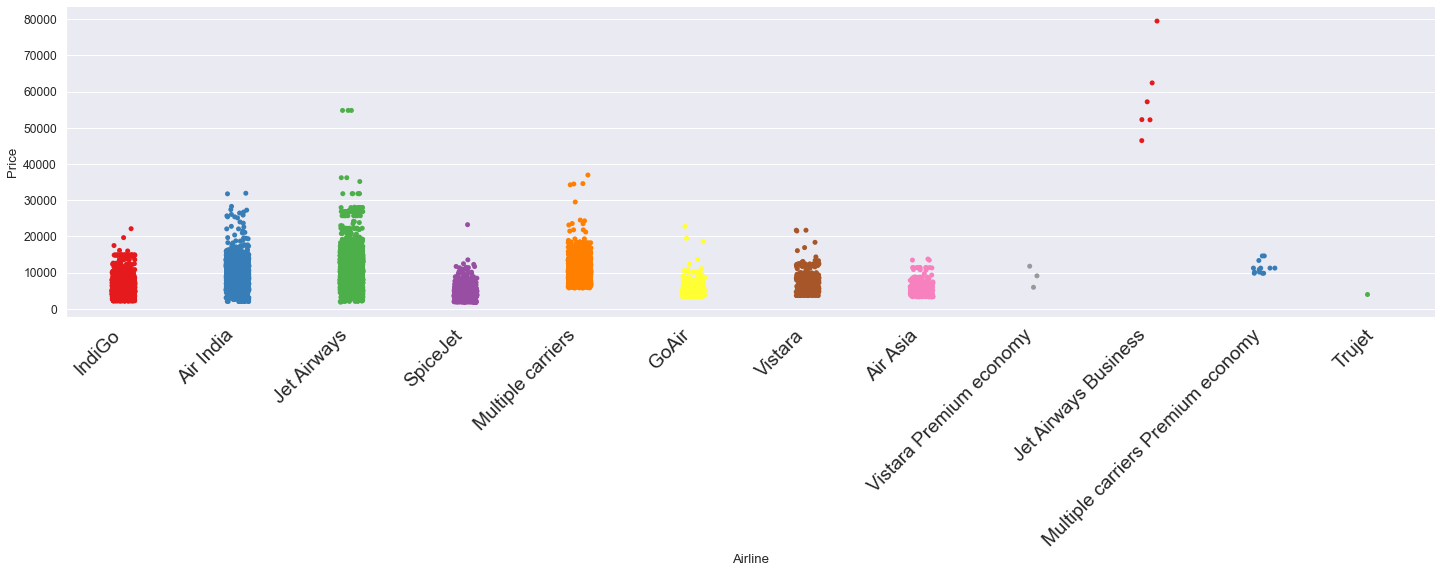

In [8]:
sns.set(font_scale=1.1)
sns.catplot(x='Airline',y='Price',data=df,height=5,aspect=4,palette='Set1')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)


### Spicejet and indigo are cheapest flights.

In [67]:

#extracting day,month ,year from date.
df['Date_of_Journey']=pd.to_datetime(df['Date_of_Journey'])
df['Day']=df['Date_of_Journey'].dt.day
df['Month']=df['Date_of_Journey'].dt.month
df['Year']=df['Date_of_Journey'].dt.year
df.drop('Date_of_Journey',axis=1,inplace=True)



df['Arrival_Time']=df['Arrival_Time'].str.split(' ').str[0]
df['Arrival_Hour']=df['Arrival_Time'].str.split(':').str[0]
df['Arrival_Minute']=df['Arrival_Time'].str.split(':').str[1]
df['Dep_Hour']=df['Dep_Time'].str.split(':').str[0]
df['Dep_Minute']=df['Dep_Time'].str.split(':').str[1]
df['Duration_hour']=df['Duration'].str.split('h').str[0]
df['Duration']=df['Duration'].str.split(' ').str[1]
df['Duration_minute']=df['Duration'].str.split('m').str[0]
df['Duration_minute'].fillna('0',inplace=True)
df.drop(['Arrival_Time'],axis=1,inplace=True)
df.drop(['Dep_Time'],axis=1,inplace=True)
df.drop(['Duration'],axis=1,inplace=True)


In [10]:
df['Duration_hour'].value_counts()

2     2387
1      621
3      500
7      487
5      481
9      445
12     426
8      424
13     381
11     365
10     355
6      340
14     337
15     262
23     240
16     234
4      222
26     214
24     195
25     183
22     181
27     174
21     172
20     161
18     130
17     128
19     125
28      93
29      50
30      49
38      31
37      17
33      10
32       9
34       7
35       7
31       6
36       5
47       2
42       2
5m       1
41       1
40       1
39       1
Name: Duration_hour, dtype: int64

In [68]:
def rep(value):
    if value=='5m':
        i='0'
    else:
        i=value
    return i

df['Duration_hour']=df['Duration_hour'].apply(lambda i:rep(i))

In [12]:
df['Duration_hour'].value_counts()

2     2387
1      621
3      500
7      487
5      481
9      445
12     426
8      424
13     381
11     365
10     355
6      340
14     337
15     262
23     240
16     234
4      222
26     214
24     195
25     183
22     181
27     174
21     172
20     161
18     130
17     128
19     125
28      93
29      50
30      49
38      31
37      17
33      10
32       9
34       7
35       7
31       6
36       5
47       2
42       2
0        1
40       1
41       1
39       1
Name: Duration_hour, dtype: int64

In [69]:
df.isnull().sum()

Airline            0
Source             0
Destination        0
Route              0
Total_Stops        0
Additional_Info    0
Price              0
Day                0
Month              0
Year               0
Arrival_Hour       0
Arrival_Minute     0
Dep_Hour           0
Dep_Minute         0
Duration_hour      0
Duration_minute    0
dtype: int64

In [14]:
df['Route'].value_counts()

DEL → BOM → COK                2376
BLR → DEL                      1536
CCU → BOM → BLR                 979
CCU → BLR                       724
BOM → HYD                       621
                               ... 
BOM → COK → MAA → HYD             1
BOM → JDH → JAI → DEL → HYD       1
BOM → JAI → DEL → HYD             1
CCU → IXB → DEL → BLR             1
BOM → DED → DEL → HYD             1
Name: Route, Length: 128, dtype: int64

In [70]:
df['Stop_1']=df['Route'].str.split('→ ').str[0]
df['Stop_2']=df['Route'].str.split('→ ').str[1]
df['Stop_3']=df['Route'].str.split('→ ').str[2]
df['Stop_4']=df['Route'].str.split('→ ').str[3]
df['Stop_5']=df['Route'].str.split('→ ').str[4]
df['Stop_6']=df['Route'].str.split('→ ').str[5]
df.drop(['Route'],axis=1, inplace=True)

In [71]:
df['Stop_1'].fillna('None',inplace=True)
df['Stop_2'].fillna('None',inplace=True)
df['Stop_3'].fillna('None',inplace=True)
df['Stop_4'].fillna('None',inplace=True)
df['Stop_5'].fillna('None',inplace=True)
df['Stop_6'].fillna('None',inplace=True)

In [17]:
df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3475
2 stops     1318
3 stops       43
4 stops        1
Name: Total_Stops, dtype: int64

In [72]:
df['Total_Stops'].replace(['non-stop'],['0 Direct'],inplace=True)

In [73]:
df['Stops']=df['Total_Stops'].str.split(' ').str[0]

In [74]:
df['Stops'].fillna('0',inplace=True)
df.drop(['Total_Stops'],axis=1,inplace=True)

In [21]:
df['Source'].value_counts()

Delhi       4345
Kolkata     2860
Banglore    2179
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [75]:
df['Day']=df['Day'].astype(int)
df['Month']=df['Month'].astype(int)
df['Arrival_Hour']=df['Arrival_Hour'].astype(int)
df['Arrival_Minute']=df['Arrival_Minute'].astype(int)
df['Dep_Hour']=df['Dep_Hour'].astype(int)
df['Dep_Minute']=df['Dep_Minute'].astype(int)
df['Duration_hour']=df['Duration_hour'].astype(int)
df['Duration_minute']=df['Duration_minute'].astype(int)

In [76]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Stop_1']=le.fit_transform(df['Stop_1'])
df['Stop_2']=le.fit_transform(df['Stop_2'])
df['Stop_3']=le.fit_transform(df['Stop_3'])
df['Stop_4']=le.fit_transform(df['Stop_4'])
df['Stop_5']=le.fit_transform(df['Stop_5'])
df['Stop_6']=le.fit_transform(df['Stop_6'])
df['Source']=le.fit_transform(df['Source'])
df['Airline']=le.fit_transform(df['Airline'])
df['Additional_Info']=le.fit_transform(df['Additional_Info'])
df['Destination']=le.fit_transform(df['Destination'])

In [78]:
df.describe()#data is categorical and seems normal.

,Airline,Source,Destination,Additional_Info,Price,Day,Month,Year,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Duration_hour,Duration_minute,Stop_1,Stop_2,Stop_3,Stop_4,Stop_5,Stop_6
count,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.0,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000
mean,3.981074,1.953642,1.439495,7.396483,9026.790289,12.630090,5.534601,2019.0,13.387689,24.719939,12.478494,24.404989,10.026190,28.209711,2.004970,11.784649,11.720799,11.055343,3.987765,0.999904
std,2.364627,1.186327,1.481015,1.212030,4624.849541,8.791635,2.995344,0.0,6.855547,16.570450,5.727227,18.815719,8.378023,16.879913,1.208648,7.833805,9.064498,2.482997,0.198559,0.009777
min,0.000000,0.000000,0.000000,0.000000,1759.000000,3.000000,1.000000,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,0.000000,8.000000,5224.000000,5.000000,3.000000,2019.0,8.000000,10.000000,8.000000,5.000000,2.000000,15.000000,1.000000,7.000000,4.000000,12.000000,4.000000,1.000000
50%,4.000000,2.000000,1.000000,8.000000,8266.000000,6.000000,5.000000,2019.0,14.000000,25.000000,11.000000,25.000000,8.000000,30.000000,2.000000,7.000000,6.000000,12.000000,4.000000,1.000000
75%,4.000000,3.000000,2.000000,8.000000,12344.750000,21.000000,6.000000,2019.0,19.000000,35.000000,18.000000,40.000000,15.000000,45.000000,3.000000,14.000000,24.000000,12.000000,4.000000,1.000000
max,11.000000,4.000000,5.000000,9.000000,79512.000000,27.000000,12.000000,2019.0,23.000000,55.000000,23.000000,55.000000,47.000000,55.000000,4.000000,44.000000,29.000000,13.000000,5.000000,1.000000


In [79]:
#year is same throughtout dataset, let's drop year column
df.drop('Year',axis=1,inplace=True)

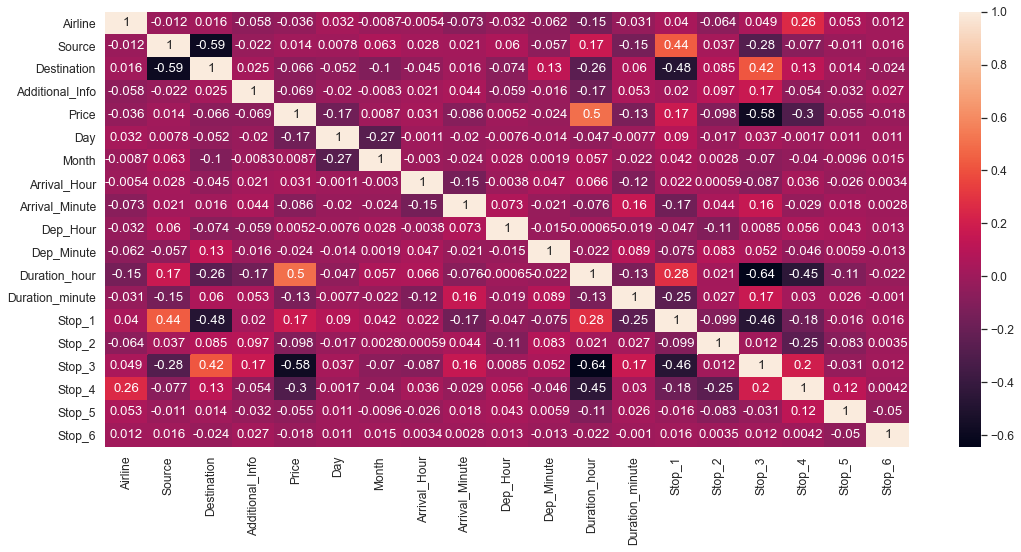

In [80]:
#let's check multicollinearity
corr=df.corr()
plt.figure(figsize=(18,8))
sns.heatmap(data=corr,annot=True)
plt.show()

In [26]:
### Source and destination, stop1 and destination,price and stop3 are negativly correlated



In [81]:
#checking correlation of features and target using corrwith
df.drop('Price',axis=1).corrwith(df.Price)
#Total_stops has highest negative relation with target column.

Airline           -0.036491
Source             0.013796
Destination       -0.065875
Additional_Info   -0.068779
Day               -0.171142
Month              0.008662
Arrival_Hour       0.031023
Arrival_Minute    -0.086163
Dep_Hour           0.005155
Dep_Minute        -0.024155
Duration_hour      0.504200
Duration_minute   -0.131709
Stop_1             0.173508
Stop_2            -0.098391
Stop_3            -0.576182
Stop_4            -0.300469
Stop_5            -0.054936
Stop_6            -0.018307
dtype: float64

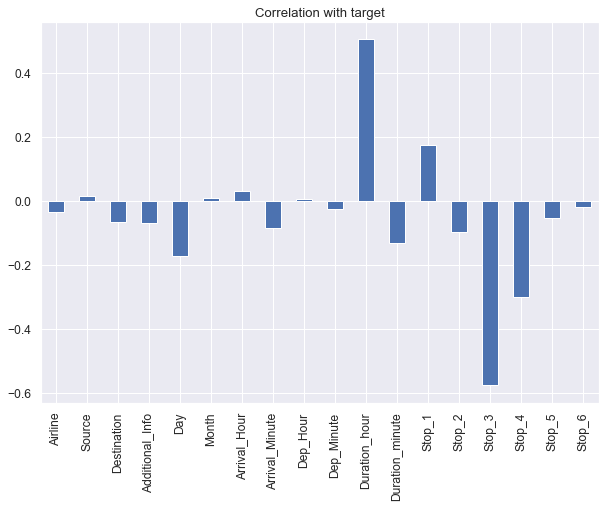

In [82]:
#visualising the correlation 
df.drop('Price',axis=1).corrwith(df.Price).plot(kind='bar',figsize=(10,7),title='Correlation with target',grid=True)
plt.show()

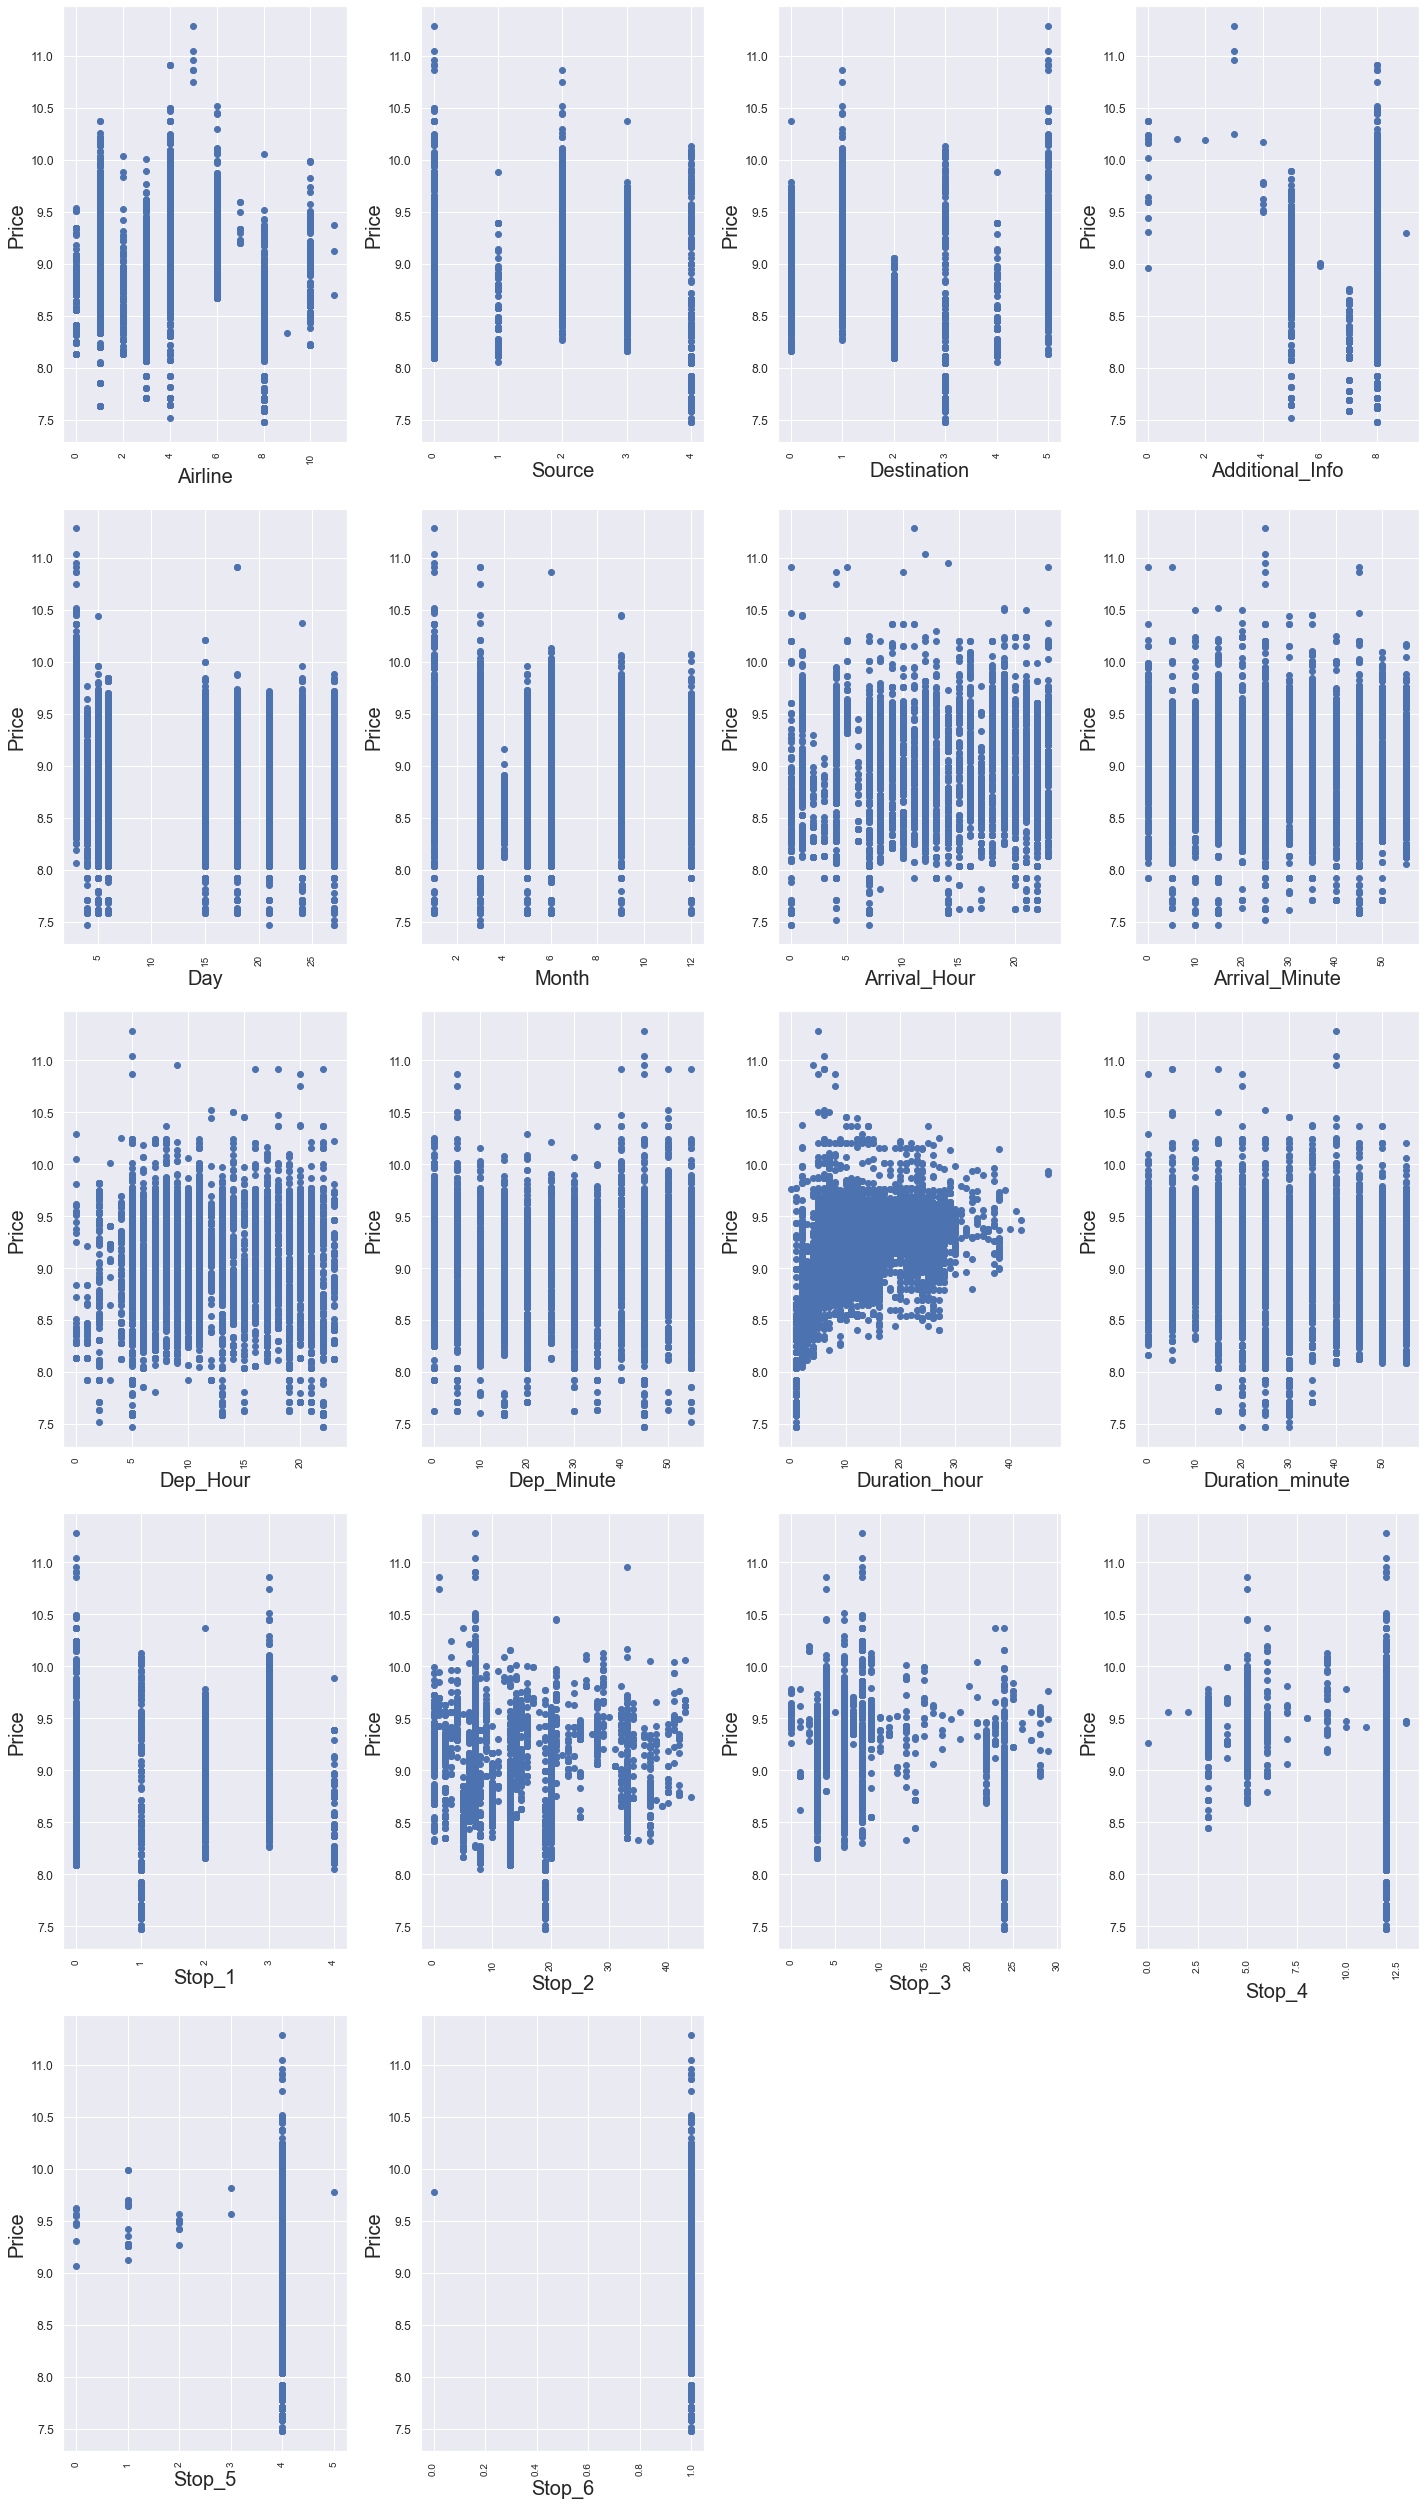

In [97]:
#visualizing data relation between feature and label
X=df.drop('Price',axis=1)
y=df.Price
plt.figure(figsize=(20,35),facecolor='white')
plotnumber=1
for column in X:
    if plotnumber<=18:
        ax=plt.subplot(5,4,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=20)
        plt.xticks(fontsize=10,rotation=90)
        plt.ylabel("Price",fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [59]:
df.skew()
#threshold=+_.60
#Airline,Destination,Additional_info,Moth have skewness but these are all categorical data hence neither we remove outliers
#nor remove skewness


Airline              0.723567
Source              -0.419669
Destination          1.225081
Additional_Info     -1.796501
Price                1.857490
Day                  0.375990
Month                0.630882
Arrival_Hour        -0.378978
Arrival_Minute       0.110802
Dep_Hour             0.108306
Dep_Minute           0.171301
Duration_hour        0.892650
Duration_minute     -0.085972
Stop_1              -0.593710
Stop_2               1.491868
Stop_3               0.556809
Stop_4              -2.317384
Stop_5             -16.693853
Stop_6            -102.283919
Stops                0.332309
dtype: float64

In [90]:
from scipy.stats import boxcox
df['Price']=boxcox(df['Price'],0)

### Let's normalise data


In [91]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_scaled=sc.fit_transform(X)

In [98]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=.30,random_state=343)

### Linear_regression

In [99]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
print(mean_absolute_error(y_test,y_pred))

print(mean_squared_error(y_test,y_pred))

print(np.sqrt(mean_squared_error(y_test,y_pred)))

#adjusted r2_score train _data
print("Train_score:",lr.score(X_train,y_train))
#r2_score for test _data
print("Test_score:",lr.score(X_test,y_test))
#Model is neither overfit nor underfit

0.2532345381137885
0.09907242697608239
0.3147577274287041
Train_score: 0.6119505049571906
Test_score: 0.6310134822729563


In [100]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

cv = KFold(n_splits=10, random_state=1, shuffle=True)




scores = cross_val_score(lr, X_scaled, y, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)

#view mean absolute error
print('Cross validation error:',np.sqrt(np.mean(np.absolute(scores))))

Cross validation error: 0.32795088455168


### Random Forest Regressor

In [101]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
print("Mean_squared_error:",(np.sqrt(mean_squared_error(y_test,y_pred))))
print("train_score:",rf.score(X_train,y_train))
print("test_score:",rf.score(X_test,y_test))



from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

cv = KFold(n_splits=10, random_state=1, shuffle=True)




scores = cross_val_score(rf, X_scaled, y, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)

#view mean absolute error
print('Cross validation error:',np.sqrt(np.mean(np.absolute(scores))))

Mean_squared_error: 0.12479760850889791
train_score: 0.9888245456640187
test_score: 0.941994360120654
Cross validation error: 0.12556699538889152


### Support vector Regressor

In [102]:
from sklearn.svm import SVR
reg = SVR(kernel = 'rbf')
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)
print("Mean_squared_error:",(np.sqrt(mean_squared_error(y_test,y_pred))))
print("train_score:",rf.score(X_train,y_train))
print("test_score:",rf.score(X_test,y_test))


cv = KFold(n_splits=10, random_state=1, shuffle=True)




scores = cross_val_score(reg, X_scaled, y, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)

#view mean absolute error
print("Cross_validation_Mean_squared_error:",np.sqrt(np.mean(np.absolute(scores))))

Mean_squared_error: 0.2046837493331855
train_score: 0.9888245456640187
test_score: 0.941994360120654
Cross_validation_Mean_squared_error: 0.2099127627542142


### KNN Regressor

In [103]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=8)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

print("Mean_squared_error:",(np.sqrt(mean_squared_error(y_test,y_pred))))
print("train_score:",model.score(X_train,y_train))
print("test_score:",model.score(X_test,y_test))

Mean_squared_error: 0.22246658136037073
train_score: 0.8506694561378862
test_score: 0.8156737201714277


In [104]:
#printing cross validation score
cv = KFold(n_splits=10, random_state=1, shuffle=True)




scores = cross_val_score(model, X_scaled, y, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)

#view mean absolute error
print("cross_validation_Mean_squared_error:",np.sqrt(np.mean(np.absolute(scores))))

cross_validation_Mean_squared_error: 0.21737159583850152


### Bagging Regressor

In [106]:
from sklearn.ensemble import BaggingRegressor

bag_regressor = BaggingRegressor(random_state=1)
bag_regressor.fit(X_train, y_train)
y_pred=bag_regressor.predict(X_test)

print("Mean_squared_error:",(np.sqrt(mean_squared_error(y_test,y_pred))))
print("train_score:",model.score(X_train,y_train))
print("test_score:",model.score(X_test,y_test))

Mean_squared_error: 0.1286199379366005
train_score: 0.8506694561378862
test_score: 0.8156737201714277


In [107]:
#printing cross validation score
cv = KFold(n_splits=10, random_state=1, shuffle=True)




scores = cross_val_score(bag_regressor, X_scaled, y, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)

#view mean absolute error
print("cross_validation_Mean_squared_error:",np.sqrt(np.mean(np.absolute(scores))))

cross_validation_Mean_squared_error: 0.13127280511214784


### ADA Boost Regressor

In [108]:
from sklearn.ensemble import AdaBoostRegressor
model_ABR = AdaBoostRegressor()
model_ABR.fit(X_train, y_train)
y_pred=model_ABR.predict(X_test)

print("Mean_squared_error:",(np.sqrt(mean_squared_error(y_test,y_pred))))
print("train_score:",model.score(X_train,y_train))
print("test_score:",model.score(X_test,y_test))

Mean_squared_error: 0.2838057480440252
train_score: 0.8506694561378862
test_score: 0.8156737201714277


In [109]:
#printing cross validation score
cv = KFold(n_splits=10, random_state=1, shuffle=True)




scores = cross_val_score(model_ABR, X_scaled, y, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)

#view mean absolute error
print("cross_validation_Mean_squared_error:",np.sqrt(np.mean(np.absolute(scores))))

cross_validation_Mean_squared_error: 0.2981476796079371


### XGBoost Regressor

In [110]:
import xgboost as xgb
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
xg_reg.fit(X_train,y_train)

y_pred = xg_reg.predict(X_test)

print("Mean_squared_error:",(np.sqrt(mean_squared_error(y_test,y_pred))))
print("train_score:",model.score(X_train,y_train))
print("test_score:",model.score(X_test,y_test))

[21:41:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
Mean_squared_error: 2.9761684114702285
train_score: 0.8506694561378862
test_score: 0.8156737201714277


### Best model with least difference between RMSE and CV score is Random Forest Regressor, Let's tune parameter.

In [111]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [113]:
from sklearn.model_selection import GridSearchCV
param={
    "n_estimators"     :[10,100,350],
    "max_features"     :["auto"],
    "min_samples_split":[2,4],
    "bootstrap"        :[True,False],
    }
gFR=GridSearchCV(rf,param_grid=param,n_jobs=-1,cv=5)
gFR.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_features': ['auto'],
                         'min_samples_split': [2, 4],
                         'n_estimators': [10, 100, 350]})

In [115]:
gFR.best_params_

{'bootstrap': True,
 'max_features': 'auto',
 'min_samples_split': 4,
 'n_estimators': 350}

In [119]:
rf=RandomForestRegressor(bootstrap= True,
 max_features= 'auto',
 min_samples_split= 4,
 n_estimators= 350)
rf.fit(X_train,y_train)

RandomForestRegressor(min_samples_split=4, n_estimators=350)

In [120]:
y_pred=rf.predict(X_test)
print("Root_Mean_squared_error:",(np.sqrt(mean_squared_error(y_test,y_pred))))

Root_Mean_squared_error: 0.12267793329957628


we have reduced error from .1247 to .1226

In [ ]:
#saving the model in local system
import pickle
filename='finalized_Flight_Price_model.pickle'
pickle.dump(rf,open(filename,'wb'))